# MTA tweet analysis
I got the impression I've been seeing more tweets about disruptive passengers by @NYCTSubway in the past few weeks/months. Did some scraping to look into this.

Caveat: This only counts the # of tweets that mention disruptive passengers, not the number of actual indicidents. The account **repeats** the messages for each incident multiple times, so we're **definitely overcounting**. If for whatever reason they started tweeting each incident more frequently in recent times, that would skew the numbers.

Two ideas to address this:
1. We could just count the number of days where at least one mention of "disruptive" occurs.
2. The tweets are pretty well structured, so it should be possible to group them by train line and time to identify individual incidents.

Feel free to copy this and go crazy.

Ping me @spbail on Twitter.

In [ ]:
# Twitter handle for announcements: @NYCTSubway

import os

# Using OS library to call CLI commands in Python
# Takes about 30-45 minutes to run so I'm leaving it commented.
# os.system("snscrape --jsonl --since 2018-01-01 twitter-user NYCTSubway > nyctsubway-tweets.json")

In [23]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)
tweet_df = pd.read_json('nyctsubway-tweets.json', lines=True)
tweet_df.T.head()

In [ ]:
df = tweet_df[['date', 'content']]
df.head()

In [25]:
# Drop all @ replies... there's a LOT of tweets!

df.drop(df[df['content'].str.startswith('@')].index, inplace = True) 
len(df)

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


78171

In [26]:
# Adding a YYYY-mm column to group by

df['year_month'] = df.date.dt.to_period('M')
df.head()

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
<ipython-input-26-faed1ce2c8f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df.date.dt.to_period('M')


,date,content,year_month
0,2021-03-02 23:41:40+00:00,Broad St-bound J trains are delayed while we r...,2021-03
1,2021-03-02 23:21:26+00:00,You may experience longer waits for northbound...,2021-03
6,2021-03-02 22:37:08+00:00,Southbound 4 5 trains have resumed running at ...,2021-03
7,2021-03-02 22:27:48+00:00,Southbound 3 trains are running at slower spee...,2021-03
9,2021-03-02 22:26:46+00:00,Southbound F trains are running at slower spee...,2021-03


In [45]:
# Flagging rows that contain the word "disruptive"
# The tweets seem to be quite structured, eg all occurrences of "disrupt%" seem to be in
# the form of "a passenger being disruptive", so I'm feeling ok with a fixed search term for now

df['contains_disruptive'] = df['content'].str.contains('disruptive')
df.head()

<ipython-input-45-a0abf72ffb34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains_disruptive'] = df['content'].str.contains('disruptive')


,date,content,year_month,contains_disruptive
0,2021-03-02 23:41:40+00:00,Broad St-bound J trains are delayed while we request NYPD assistance for a report of an unauthorized person on the tracks at Canal St.,2021-03,False
1,2021-03-02 23:21:26+00:00,You may experience longer waits for northbound 4 and 5 trains in Manhattan after NYPD responded to a passenger being disruptive at Grand Central-42 St.,2021-03,True
6,2021-03-02 22:37:08+00:00,Southbound 4 5 trains have resumed running at regular speeds between 59 St and Grand Central-42 St after we addressed a signal problem near 59 St. https://t.co/hF9XuwXmmO,2021-03,False
7,2021-03-02 22:27:48+00:00,Southbound 3 trains are running at slower speeds between Crown Hts-Utica Av and Sutter Av-Rutland Rd while we work to correct a signal problem near Crown Hts-Utica Av.,2021-03,False
9,2021-03-02 22:26:46+00:00,Southbound F trains are running at slower speeds from Jay St-MetroTech to Bergen St because of a signal malfunction south of Jay St-MetroTech.,2021-03,False


In [77]:
# Just bear with me, I'm just making this work the easiest way possible ok

df['tweet_count'] = 1
df.head()

<ipython-input-77-6e46a7eb7927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_count'] = 1


,date,content,year_month,contains_disruptive,tweet_count
0,2021-03-02 23:41:40+00:00,Broad St-bound J trains are delayed while we request NYPD assistance for a report of an unauthorized person on the tracks at Canal St.,2021-03,False,1
1,2021-03-02 23:21:26+00:00,You may experience longer waits for northbound 4 and 5 trains in Manhattan after NYPD responded to a passenger being disruptive at Grand Central-42 St.,2021-03,True,1
6,2021-03-02 22:37:08+00:00,Southbound 4 5 trains have resumed running at regular speeds between 59 St and Grand Central-42 St after we addressed a signal problem near 59 St. https://t.co/hF9XuwXmmO,2021-03,False,1
7,2021-03-02 22:27:48+00:00,Southbound 3 trains are running at slower speeds between Crown Hts-Utica Av and Sutter Av-Rutland Rd while we work to correct a signal problem near Crown Hts-Utica Av.,2021-03,False,1
9,2021-03-02 22:26:46+00:00,Southbound F trains are running at slower speeds from Jay St-MetroTech to Bergen St because of a signal malfunction south of Jay St-MetroTech.,2021-03,False,1


In [78]:
# Work the magic - this gives us the sum of tweets and the sum of contains_disruptive=True per month

grouped_df = df.groupby('year_month').sum()
grouped_df.head()

,contains_disruptive,tweet_count
year_month,,
2018-01,0,2166
2018-02,0,1594
2018-03,0,1888
2018-04,0,1674
2018-05,0,1518


In [79]:
# Also get the percentage 

grouped_df['pct'] = grouped_df['contains_disruptive'] / grouped_df['tweet_count'] * 100
grouped_df.tail()

,contains_disruptive,tweet_count,pct
year_month,,,
2020-11,209,2176,9.604779
2020-12,194,2342,8.283518
2021-01,241,2325,10.365591
2021-02,260,2437,10.668855
2021-03,24,194,12.371134


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline
sns.set()

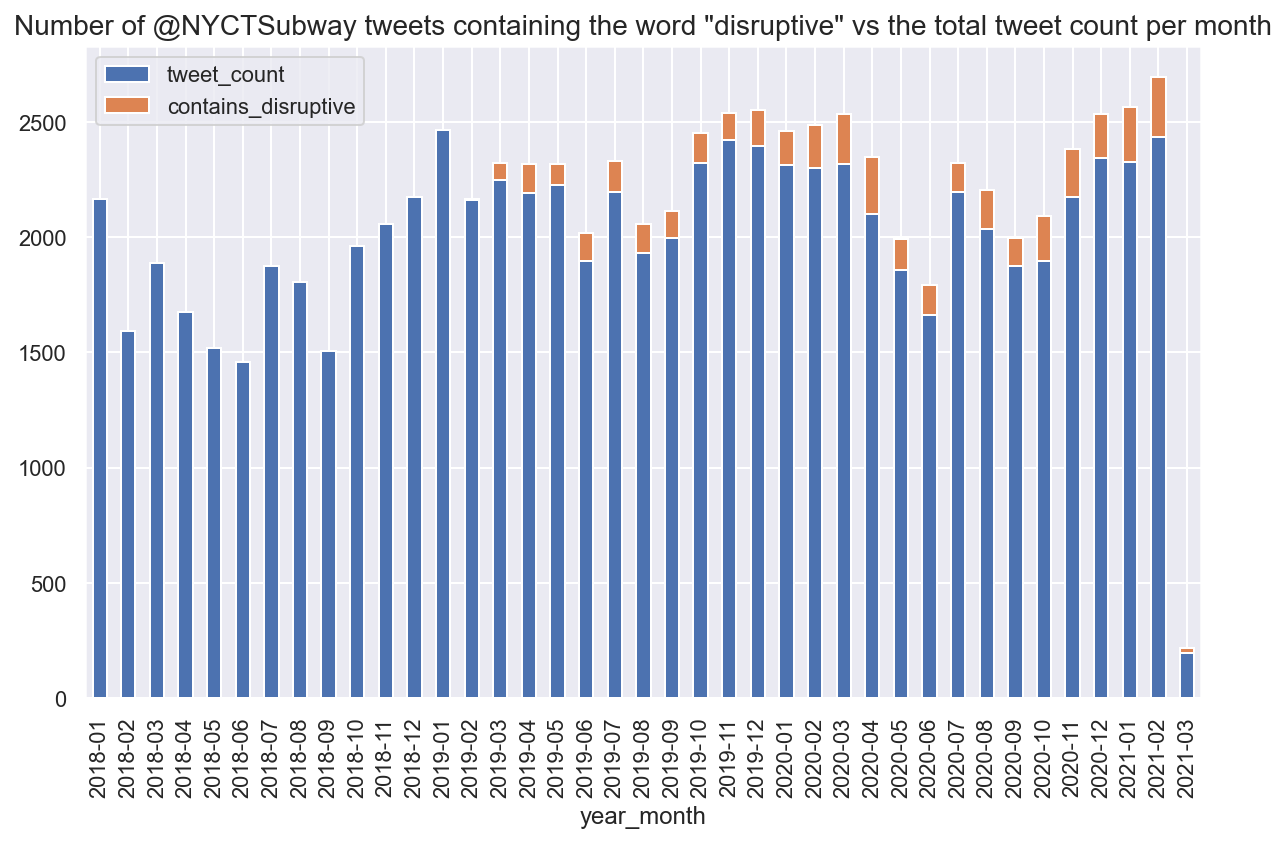

In [90]:
# Plot 1: stacked bar, number of total tweets vs tweets containg "disruptive" per month

plt.rcParams['figure.figsize'] = [10,6]
grouped_df[['tweet_count', 'contains_disruptive']].plot(kind='bar', stacked=True)
plt.title('Number of @NYCTSubway tweets containing the word "disruptive" vs the total tweet count per month', size=14)
plt.show()

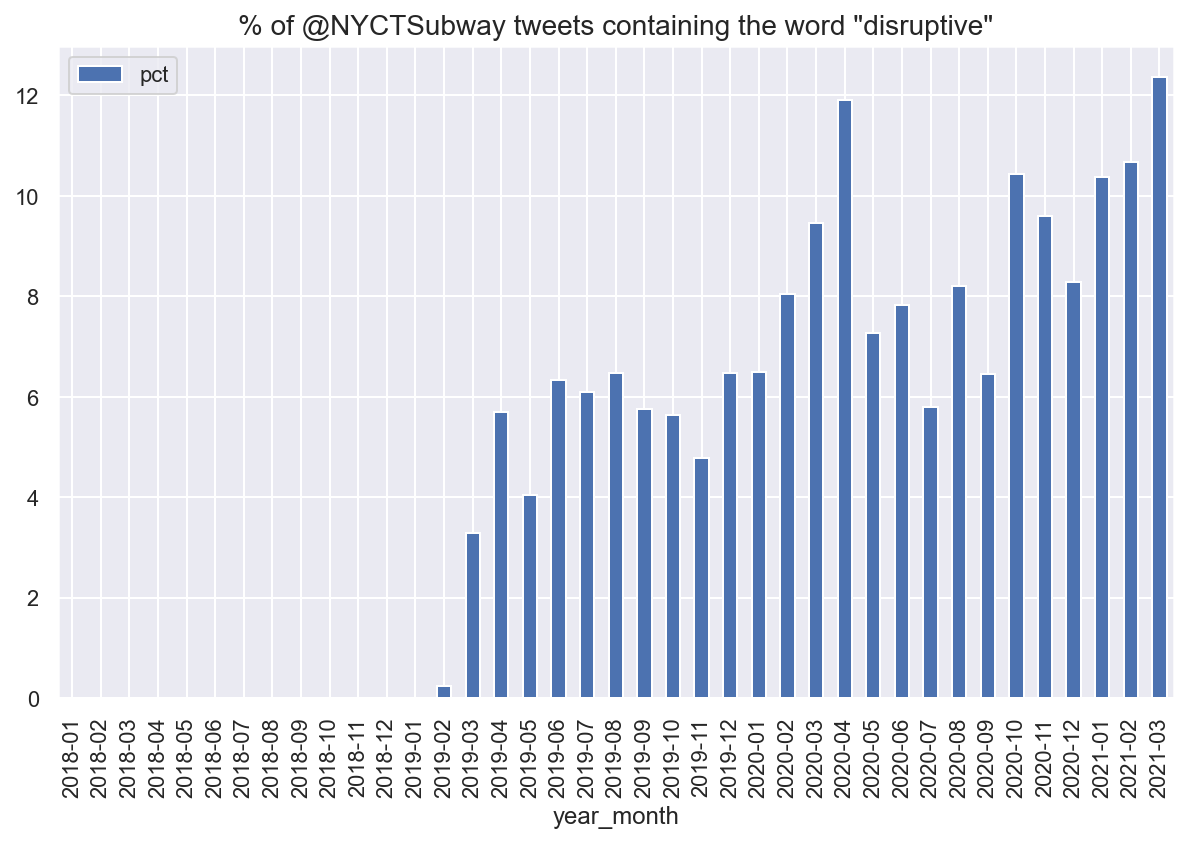

In [91]:
# Plot 2: bar, % of tweets containg "disruptive" per month

plt.rcParams['figure.figsize'] = [10,6]
grouped_df[['pct']].plot(kind='bar')
plt.title('% of @NYCTSubway tweets containing the word "disruptive"', size=14)
plt.show()